In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
#import cPickle as pickle
#import tensorflow as tf
%matplotlib inline
import random
import matplotlib.pyplot as plt
import math
import os, sys
from scipy.stats import rankdata
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras import regularizers

import gym

/Users/xbno/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a

432         free(self->host_structure);
433         self->host_structure = NULL;
434     }
435     self->nd = -1;
436     Py_XDECREF(self->base);
437     self->base = NULL;
438     return rval;
439 }
440 
441 
442 //make the rightmost coords change fastest
443 //TODO: why does a downward for-loop not work????
444 //TODO: use the log2_dims and driver code to remove / and %
445 //TODO: skip the last division (when d == 0)
446 #define decl_k_elemwise_unary_rowmajor(name, F) \
447 __global__ void name (unsigned int numEls,  \
448         unsigned int nd, \
449         const int * dim,  \
450         const float * a_data, const int * a_str, \
451         float * z_data, const int * z_str) \
452 { \
453     const unsigned int idx = blockIdx.x * blockDim.x + threadIdx.x; \
454     const unsigned int numThreads = blockDim.x * gridDim.x; \
455  \
456     for (unsigned int i = idx; i < numEls; i += numThreads) \
457     { \
458         unsigned int ii = i; \
459         const float * a_i = a_dat

1216     void (*k3)(const int, const int, const int,
1217                const npy_int64*,
1218                float*, const int, const int, const int,
1219                const float*, const int,
1220                const int, const int, const int,
1221                int*);
1222     k3 = k_take_3<CPY>;
1223 
1224     // Create the memory place that will store the error information.
1225     if(init_err_var() != 0) return NULL;
1226 
1227     dim3 n_blocks(std::min(CudaNdarray_HOST_DIMS(out)[0],65535),1,1);
1228     if(CudaNdarray_HOST_DIMS(out)[0] == 0){
1229         // We take 0 elements, so no need for the rest of the code.
1230         // This speed up that case AND fix crash otherwise.
1231         free(dims);
1232         Py_DECREF(indices);
1233         return (PyObject *)out;
1234     }
1235 
1236     switch (self->nd) {
1237         case 1:
1238             {
1239                 dim3 n_threads(1, 1, 1);
1240                 if (verbose)
1241                     printf("cudaG

1923                 {
1924                     PyErr_Format(
1925                         PyExc_RuntimeError,
1926                         "CudaNdarray_inplace_elemwise case3: Cuda error: %s: %s.\n",
1927                         "k3",
1928                         cudaGetErrorString(err));
1929                     Py_XDECREF(new_other);
1930                     return -1;
1931                 }
1932             }
1933             break;
1934         case 4:
1935             {
1936                 dim3 n_blocks(
1937                         std::min(
1938                             CudaNdarray_HOST_DIMS(self)[0],
1939                             NUM_VECTOR_OP_BLOCKS),
1940                         CudaNdarray_HOST_DIMS(self)[1]
1941                         );
1942                 while (n_blocks.x * n_blocks.y > NUM_VECTOR_OP_BLOCKS)
1943                     n_blocks.y /= 2;
1944                 dim3 n_threads(
1945                         std::min(
1946                             Cuda

2719             return -1;
2720         }
2721     }else if (PyList_Check(value)){
2722         if (PyList_Size(value) != CudaNdarray_NDIM(self)){
2723             PyErr_SetString(PyExc_ValueError,
2724                             "The new strides list must have the same length"
2725                             " as the number of dimensions");
2726             return -1;
2727         }
2728     }else{
2729         PyErr_SetString(PyExc_ValueError,
2730                         "The new strides need to be encoded in a tuple or list");
2731         return -1;
2732     }
2733     npy_intp* newstrides = (npy_intp*) alloca(CudaNdarray_NDIM(self) * sizeof(npy_intp));
2734     if (PyTuple_Check(value)){
2735         for(int i=0; i < CudaNdarray_NDIM(self); i++){
2736             newstrides[i] = PyInt_AsLong(PyTuple_GetItem(value, Py_ssize_t(i)));
2737             //newstrides_bytes[i] = newstrides[i] * 4;
2738         }
2739     }else if (PyList_Check(value)){
2740         for(int i=0; i < Cu

3492         //TODO: support non-strict "casting" from a vt to the broadcastable/type/size that we need.
3493         if (!CudaNdarray_Check(py_data))
3494         {
3495             Py_DECREF(py_data);
3496             Py_DECREF(broadcastable);
3497             PyErr_SetString(PyExc_TypeError, "strict mode requires CudaNdarray");
3498             return NULL;
3499         }
3500         if (cnda->nd != PyTuple_Size(broadcastable))
3501         {
3502             Py_DECREF(py_data);
3503             Py_DECREF(broadcastable);
3504             PyErr_Format(PyExc_TypeError, "Wrong rank: %i vs %li", cnda->nd, (long)PyTuple_Size(broadcastable));
3505             return NULL;
3506         }
3507         for (int i = 0; i < cnda->nd; ++i)
3508         {
3509             if ((CudaNdarray_HOST_DIMS(cnda)[i] > 1) && PyInt_AsLong(PyTuple_GetItem(broadcastable, Py_ssize_t(i))))
3510             {
3511                 PyErr_Format(PyExc_TypeError, "Non-unit size in broadcastable vt dimension %i", i

4304                      "cublasSgemm failed (%i) %s\n"
4305                      " unit=%x N=%d, c.dims=[%d %d], a.dim=[%d %d], alpha=%f, beta=%f, a=%p, b=%p, c=%p"
4306                      " sa_0=%d, sa_1=%d, sb_0=%d, sb_1=%d, sc_0=%d, sc_1=%d",
4307                      err,  cublasGetErrorString(err),
4308                      unit, N,
4309                      CudaNdarray_HOST_DIMS(C)[0],
4310                      CudaNdarray_HOST_DIMS(C)[1],
4311                      CudaNdarray_HOST_DIMS(A)[0], CudaNdarray_HOST_DIMS(A)[1],
4312                      alpha, beta, a, b, c, sa_0, sa_1, sb_0, sb_1, sc_0, sc_1);
4313 
4314         return -1;
4315     }
4316     return 0;
4317 }
4318 
4319 int CudaNdarray_sgemv(float alpha, const CudaNdarray * A, const CudaNdarray * B, float beta, CudaNdarray * C)
4320 {
4321     /**
4322     * C <- alpha A B + beta C
4323     *    A : matrix
4324     *    B, C: vector
4325     *    alpha, beta: scalars
4326     */
4327     if (A->nd != 2) { PyErr_Se

5253             return NULL;
5254     }
5255     return self->dev_structure + 2*self->nd;
5256 }
5257 float *
5258 CudaNdarray_DEV_DATA(const CudaNdarray * self)
5259 {
5260     return self->devdata;
5261 }
5262 
5263 /**
5264  * Return the number of elements in the ndarray (product of the dimensions)
5265  */
5266 size_t
5267 CudaNdarray_SIZE(const CudaNdarray *self)
5268 {
5269     if (self->nd == -1) return 0;
5270     size_t size = 1;
5271     for (int i = 0; i < self->nd; ++i)
5272     {
5273         size *= CudaNdarray_HOST_DIMS(self)[i];
5274     }
5275     return size;
5276 }
5277 
5278 PyObject *
5279 CudaNdarray_SIZE_Object(const CudaNdarray *self, void *closure)
5280 {
5281     return PyInt_FromLong(CudaNdarray_SIZE(self));
5282 }
5283 
5284 int CudaNdarray_set_device_data(CudaNdarray * self, float * data, const CudaNdarray * base)
5285 {
5286     return CudaNdarray_set_device_data(self, data, (PyObject *) base);
5287 }
5288 
5289 PyObject * CudaNdarray_IS_C_Contiguous(Cuda


['nvcc', '-shared', '-O3', '-use_fast_math', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,-fPIC,-fvisibility=hidden', '-Xlinker', '-rpath,/Users/xbno/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.2-64/cuda_ndarray', '-I/Users/xbno/anaconda3/lib/python3.6/site-packages/theano/sandbox/cuda', '-I/Users/xbno/anaconda3/lib/python3.6/site-packages/numpy/core/include', '-I/Users/xbno/anaconda3/include/python3.6m', '-I/Users/xbno/anaconda3/lib/python3.6/site-packages/theano/gof', '-L/Users/xbno/anaconda3/lib', '-o', '/Users/xbno/.theano/compiledir_Darwin-16.7.0-x86_64-i386-64bit-i386-3.6.2-64/cuda_ndarray/cuda_ndarray.so', 'mod.cu', '-lcublas', '-lcudart', '-Xcompiler', '-undefined,dynamic_lookup', '-Xlinker', '-pie']


In [5]:
def s(obs,num=4):
    return np.reshape(obs, [1, num])

In [10]:
def nb_watch_model(model,layers):
    model.save_weights('model.cartpole')
    str_layers = ','.join([str(i) for i in layers])
    os.system('/Users/xbno/anaconda3/bin/python single_model.py -m model.cartpole -l {}'.format(str_layers))

In [3]:
good_models = pickle.load(open('good_models.p','rb'))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


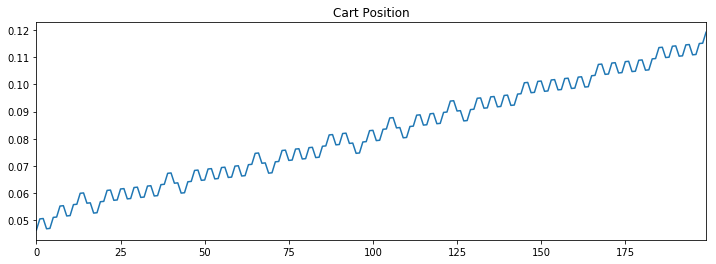

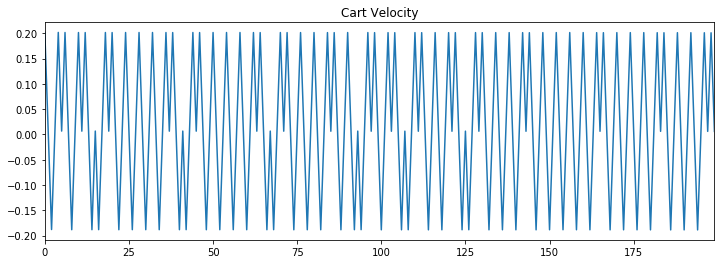

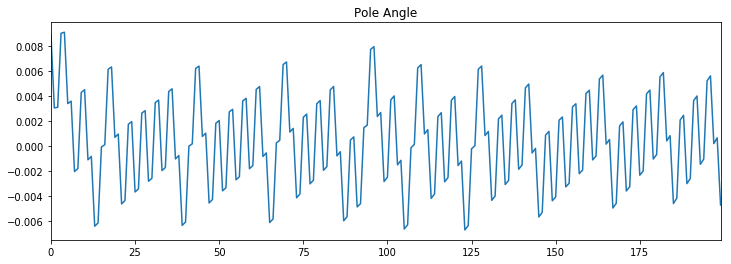

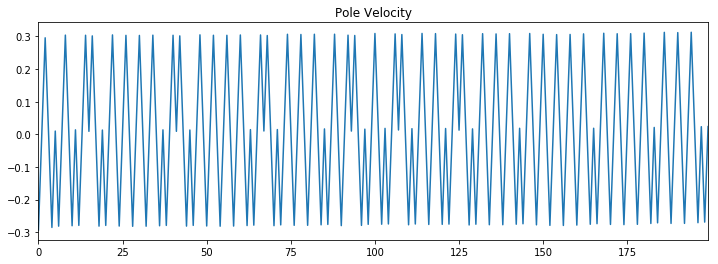

In [332]:
env = gym.make('CartPole-v0')
points = 0
observed_run = []
layers = [4,4,2,1]

obs = env.reset()

for t in range(200):
    #env.render()
    action = good_models[0].predict_classes(s(obs))
    obs, reward, done, _ = env.step(action[0][0])
    
    observed_run.append(obs)
    points += reward
    if done:
        env.reset()

df = pd.DataFrame(observed_run)
df.columns = ['Cart Position','Cart Velocity','Pole Angle','Pole Velocity']

for col in df.columns:
    df[col].plot(figsize=(12,4))
    plt.title(col)
    plt.figure()

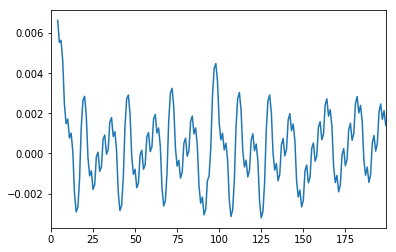

In [341]:
df['Pole Angle'].rolling(5).mean().plot()

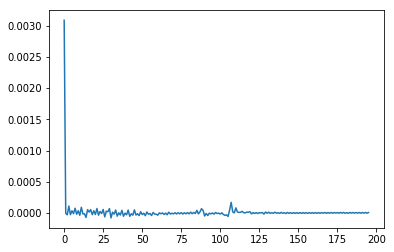

In [351]:
plt.plot(rfft(df['Pole Angle'].abs().rolling(5).mean().dropna().values/t))

/Users/xbno/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


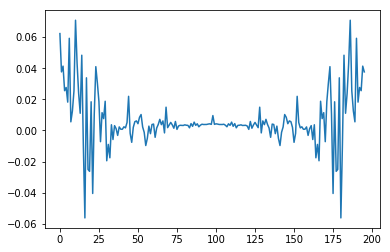

In [347]:
plt.plot(np.fft.fft(df['Pole Angle'].rolling(5).mean().dropna().values))

make a new reward?

In [327]:
from scipy.fftpack import fft, rfft, irfft

In [130]:
from math import exp 
def sigmoid(x):
    "Numerically-stable sigmoid function."
    if x >= 0:
        z = exp(-x)
        return 1 / (1 + z)
    else:
        z = exp(x)
        return z / (1 + z)

In [283]:
def create_tan(fs=600,f=10):
    x = np.arange(fs)
    sin = np.array([np.sin(2*np.pi*f*(i/fs)) for i in x])
    cos = np.array([np.cos(2*np.pi*f*(i/fs)) for i in x])
    tan = np.array([np.tan(2*np.pi*f*(i/fs)) for i in x])
    tan[tan > 100] = 0
    tan = tan/(tan.max()*50)
    saw = np.array([signal.sawtooth(2*np.pi*f*(i/fs)) for i in x])
    saw = saw/27
    return saw

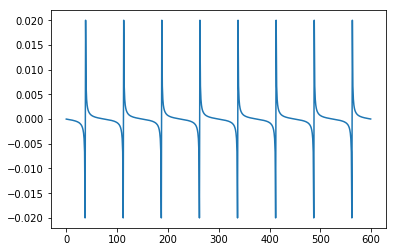

In [231]:
tan = create_tan(fs=600,f=4)
plt.plot(tan*-1)

make the reward large when the difference between these is small

In [238]:
def dance_reward(observed_run):
    df = pd.DataFrame(observed_run)
    df.columns = ['Cart Position','Cart Velocity','Pole Angle','Pole Velocity']
    
    tan = create_tan(fs=600,f=4)
    shift = df['Pole Angle'].shape[0]
    pole_angle_rewards = np.array([])

    start = 0
    end = shift

    for i in range(shift):
        shifted_reward = np.sum(np.abs(tan[start:end]-df['Pole Angle'].values))
        inv_shifted_reward = np.sum(np.abs((-1*tan[start:end])-df['Pole Angle'].values))
        pole_angle_rewards = np.append(pole_angle_rewards,shifted_reward)
        pole_angle_rewards = np.append(pole_angle_rewards,inv_shifted_reward)
        start += 1
        end += 1

    return pole_angle_rewards.min()

In [240]:
100/ dance_reward(observed_run)

72.08241043904475

In [241]:
from scipy import signal

In [287]:
def create_tan(fs=600,f=3):
    x = np.arange(fs)
    sin = np.array([np.sin(2*np.pi*f*(i/fs)) for i in x])
    cos = np.array([np.cos(2*np.pi*f*(i/fs)) for i in x])
    tan = np.array([np.tan(2*np.pi*f*(i/fs)) for i in x])
    saw = np.array([signal.sawtooth(2*np.pi*f*(i/fs)) for i in x])
    saw = saw/27
    return saw

In [300]:
saw = create_tan()

In [320]:
sig_mask = np.abs(np.copy(saw))
sig_mask[sig_mask > .01] = 1
sig_mask[sig_mask < .01] = 0

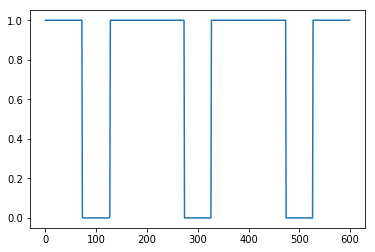

In [321]:
plt.plot(sig_mask)

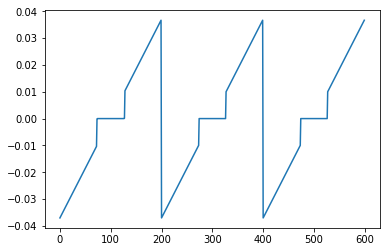

In [322]:
plt.plot(saw*sig_mask)

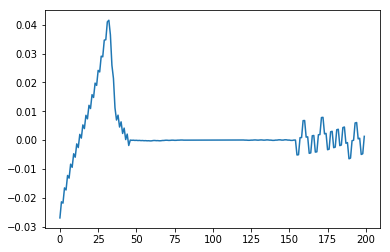

In [311]:
plt.plot(df['Pole Angle'].values*sig_mask[:200])

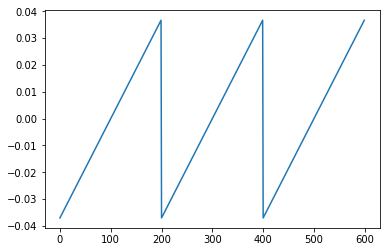

In [289]:
plt.plot(saw)

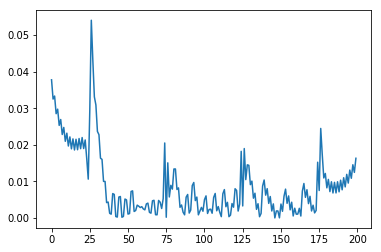

In [176]:
plt.plot(np.abs(tan-df['Pole Angle'].values))

In [184]:
20/np.sum(np.abs(tan-df['Pole Angle'].values))

11.118716355875776

2.0